Questions:
1. pourquoi le nombre de couches augmente ? 32 > 64 comment décider ? 



In [1]:
# A mettre au début d'un colab pour enregistrer data sur le MyDrive
#from google.colab import drive
#drive.mount('/content/gdrive')

In [126]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [127]:
#CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [128]:
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [129]:
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [130]:
# dense 
model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

N.B: optimier = 'rmsprop: 
Maintenir une moyenne mobile (actualisée) du carré des dégradés Divisez le gradient par la racine de cette moyenne

Data pre­processing and data augmentation
https://keras.io/api/preprocessing/image/

https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/


In [131]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,rescale=1./255,
                             shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [132]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,height_shift_range=0.2,
                             shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')


In [133]:
#from google.colab import drive
#drive.mount('/content/drive')

In [134]:
img = load_img('data/train/cats/cat710a.jpg') # this is a PIL image
x = img_to_array(img) # this is a Numpy array with shape (3, 150, 150)
print(x.shape)
x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1, 3, 150, 150)
print(x.shape)
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='data/preview', save_prefix='cat', save_format='jpeg'):
  i += 1
  if i > 20:
    break # otherwise the generator would loop indefinitely

(189, 189, 3)
(1, 189, 189, 3)


In [135]:
from keras.backend import clear_session
clear_session()

In [136]:
model.compile(loss='binary_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

In [137]:
batch_size = 16
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [138]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

In [139]:
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
'data/train', #this is the target directory
classes = ["cats","dogs"],
target_size=(150, 150), # all images will be resized to 150x150
batch_size=batch_size,
class_mode='binary') # since we use binary_crossentropy loss, we need binary labels

Found 176 images belonging to 2 classes.


In [140]:
# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
'data/validation',
classes = ["cats","dogs"],
target_size=(150, 150),
batch_size=batch_size,
class_mode='binary')

Found 30 images belonging to 2 classes.


In [141]:
clear_session
history = model.fit_generator(train_generator,epochs=20,validation_data=validation_generator)
#steps_per_epoch= 2 batch_size,
#validation_steps= 2 
model.save_weights('data/first_try.h5') # always save your weights after training or during training

/home/wiem/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
11/11 [==============================] - 5s 348ms/step - loss: 0.9599 - accuracy: 0.5184 - val_loss: 0.6812 - val_accuracy: 0.5667
Epoch 2/20
11/11 [==============================] - 4s 326ms/step - loss: 0.6772 - accuracy: 0.6200 - val_loss: 0.6703 - val_accuracy: 0.5667
Epoch 3/20
11/11 [==============================] - 4s 340ms/step - loss: 0.6594 - accuracy: 0.6674 - val_loss: 0.5970 - val_accuracy: 0.7667
Epoch 4/20
11/11 [==============================] - 4s 334ms/step - loss: 0.5997 - accuracy: 0.7229 - val_loss: 0.5191 - val_accuracy: 0.7333
Epoch 5/20
11/11 [==============================] - 4s 332ms/step - loss: 0.5460 - accuracy: 0.7397 - val_loss: 0.5217 - val_accuracy: 0.8000
Epoch 6/20
11/11 [==============================] - 4s 326ms/step - loss: 0.5513 - accuracy: 0.7171 - val_loss: 0.5261 - val_accuracy: 0.7333
Epoch 7/20
11/11 [==============================] - 4s 327ms/step - loss: 0.5583 - accuracy: 0.7158 - val_loss: 0.4546 - val_accuracy: 0.8000
Epoch 

In [142]:
import os
#current_path = os.path.join(src, animal)
list_bear=[] 
for file in os.listdir("data/train/dogs"):
    list_bear.append(file)
print (len(list_bear) ) 

89


In [143]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training acc')
    plt.plot(x, val_accuracy, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [144]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


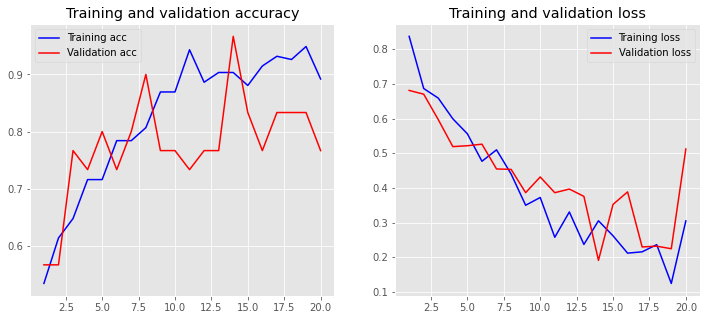

In [145]:
plot_history(history)

In [24]:
#!pwd
#!cd sample_data/train
#!ls -all

In [25]:
#!ls
#!ls /content/gdrive/MyDrive/
#!cp -a  sample_data /content/gdrive/MyDrive

In [146]:
import keras
from keras.models import load_model
from keras.models import Sequential
import cv2
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
#model = Sequential()

#model =load_model('first_try.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('datas/DogHead/dog000001c.jpg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img)
print(classes)

[[1]]


/home/wiem/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [147]:
validation_generator.class_indices

{'cats': 0, 'dogs': 1}

In [148]:
list_bear=[] 
for file in os.listdir("data/train/dogs"):
    list_bear.append(file)
print (len(list_bear) ) 

89


In [149]:

#model = Sequential()

#model =load_model('first_try.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('data/validation/dogs/dog000757a.jpg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img)
print(classes)

[[1]]


In [150]:
# Model multiclasses

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [151]:
batch_size = 16
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

In [152]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

In [153]:
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
'data/train', # this is the target directory
classes = ["cats","dogs","rabbits"],
target_size=(150, 150), # all images will be resized to 150x150
batch_size=batch_size)
#,class_mode='binary')

Found 264 images belonging to 3 classes.


In [154]:
# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
'data/validation',
classes = ["cats","dogs","rabbits"],
target_size=(150, 150),
batch_size=batch_size)
#,class_mode='binary')

Found 42 images belonging to 3 classes.


In [155]:
history = model.fit_generator(
train_generator,
#steps_per_epoch= 2 , # // batch_size,
epochs=20,
validation_data=validation_generator,
#validation_steps= 2 
) # // batch_size)
model.save_weights('data/first_try.h5') # always save your weights after training or during training

/home/wiem/anaconda3/envs/deeplearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
17/17 [==============================] - 6s 328ms/step - loss: 1.6049 - accuracy: 0.3370 - val_loss: 1.0683 - val_accuracy: 0.4286
Epoch 2/20
17/17 [==============================] - 5s 310ms/step - loss: 1.0905 - accuracy: 0.3668 - val_loss: 1.0355 - val_accuracy: 0.4286
Epoch 3/20
17/17 [==============================] - 6s 317ms/step - loss: 1.1939 - accuracy: 0.4254 - val_loss: 1.1781 - val_accuracy: 0.4524
Epoch 4/20
17/17 [==============================] - 5s 310ms/step - loss: 1.0151 - accuracy: 0.5272 - val_loss: 0.9756 - val_accuracy: 0.5238
Epoch 5/20
17/17 [==============================] - 5s 306ms/step - loss: 0.9980 - accuracy: 0.6261 - val_loss: 0.9740 - val_accuracy: 0.5952
Epoch 6/20
17/17 [==============================] - 5s 310ms/step - loss: 0.8093 - accuracy: 0.6991 - val_loss: 0.8188 - val_accuracy: 0.6429
Epoch 7/20
17/17 [==============================] - 5s 311ms/step - loss: 0.7359 - accuracy: 0.6888 - val_loss: 1.1101 - val_accuracy: 0.5476
Epoch 

In [156]:
validation_generator.class_indices

{'cats': 0, 'dogs': 1, 'rabbits': 2}

In [157]:
#img = load_img('drive/MyDrive/sample_data/train/cats/cat453a.jpg') # this is a PIL image
#x = img_to_array(img) # this is a Numpy array with shape (3, 150, 150)
#print(x.shape)
#x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1, 3, 150, 150)
#print(x.shape)


img = cv2.imread('data/chat.jpg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img)
print(classes)

[2]


In [158]:
#Random Search

In [159]:
batch_size = 16
# this is the augmentation configuration we will use for training
#train_datagen = ImageDataGenerator("rescale=1./255,
#shear_range=0.2,
#zoom_range=0.2,
#horizontal_flip=True)


datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [160]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

In [161]:
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
'data/train', # this is the target directory
classes = ["cats","dogs","rabbits"],
target_size=(150, 150), # all images will be resized to 150x150
batch_size=batch_size)
#,class_mode='binary')

Found 264 images belonging to 3 classes.


In [162]:
train_generator.samples

264

In [163]:
# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
'data/validation',
classes = ["cats","dogs","rabbits"],
target_size=(150, 150),
batch_size=batch_size)
#,class_mode='binary')

Found 42 images belonging to 3 classes.


In [164]:
train_generator.class_indices
validation_generator.class_indices

{'cats': 0, 'dogs': 1, 'rabbits': 2}

In [165]:
#X_train, y_train = next(train_generator)
#X_test, y_test = next(validation_generator)

# ajoutée par Bassem
X_train, y_train = next(iter(train_generator))
X_test, y_test = next(iter(validation_generator))

In [166]:
print(X_train.shape)
print(y_train.shape)

(16, 150, 150, 3)
(16, 3)


In [167]:
param_grid = dict(num_filters=[16,32,64],
                  num_filters1= [64], 
                  kernel_size=[(3, 3)],
                  dropout = [0.3, 0.5],
                  optimizer =['RMSprop','Adam'])

In [168]:
X_train, y_train = next(train_generator)
X_test, y_test = next(validation_generator)

In [169]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(16, 150, 150, 3)
(16, 3)
(16, 150, 150, 3)
(16, 3)


In [170]:
def create_model(num_filters,num_filters1, kernel_size, optimizer):#, Dropout):
    #CNN
    model = Sequential()
    model.add(Conv2D(num_filters, kernel_size, input_shape=(150, 150, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(num_filters1, kernel_size))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(num_filters1, kernel_size))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # dense 
    model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(num_filters1))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
    optimizer= optimizer,
    metrics=['accuracy'])
    return model

In [171]:
param_grid = dict(num_filters=[32, 64],
                  num_filters1=[32, 64, 128],
                  kernel_size=[(5,5),(3,3),(2,2)],
                 optimizer=['rmsprop', 'adam', 'sgd'])#dropout=[0.5, 0.2])
                 

In [172]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
clear_session()
epochs = 10

model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=16, verbose=True)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_test,y_test)
print('accuracy_test = ',test_accuracy)

print('best socre = ', grid_result.best_score_)
print('best param = ',grid_result.best_params_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Epoch 1/10
1/1 [==============================] - 1s 698ms/step - loss: 1.1152 - accuracy: 0.1667
Epoch 2/10
1/1 [==============================] - 0s 364ms/step - loss: 1.0837 - accuracy: 0.4167
Epoch 3/10
1/1 [==============================] - 0s 364ms/step - loss: 1.1103 - accuracy: 0.1667
Epoch 4/10
1/1 [==============================] - 0s 347ms/step - loss: 1.1178 - accuracy: 0.2500
Epoch 5/10
1/1 [==============================] - 0s 345ms/step - loss: 1.0961 - accuracy: 0.4167
Epoch 6/10
1/1 [==============================] - 0s 343ms/step - loss: 1.0990 - accuracy: 0.2500
Epoch 7/10
1/1 [==============================] - 0s 355ms/step - loss: 1.1016 - accuracy: 0.2500
Epoch 8/10
1/1 [==============================] - 0s 350ms/step - loss: 1.0873 - accuracy: 0.4167
Epoch 9/10
1/1 [==============================] - 0s 351ms/step - loss: 1.1053 - accuracy: 0.0833
Epoch 10/10
1/1 [==============================] - 0s 154m

1/1 [==============================] - 0s 144ms/step - loss: 1.0343 - accuracy: 0.5000
Epoch 1/10
1/1 [==============================] - 1s 556ms/step - loss: 1.0755 - accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 0s 192ms/step - loss: 1.0815 - accuracy: 0.3333
Epoch 3/10
1/1 [==============================] - 0s 181ms/step - loss: 1.0581 - accuracy: 0.4167
Epoch 4/10
1/1 [==============================] - 0s 203ms/step - loss: 1.0324 - accuracy: 0.4167
Epoch 5/10
1/1 [==============================] - 0s 193ms/step - loss: 1.0481 - accuracy: 0.4167
Epoch 6/10
1/1 [==============================] - 0s 199ms/step - loss: 1.1568 - accuracy: 0.4167
Epoch 7/10
1/1 [==============================] - 0s 255ms/step - loss: 1.1282 - accuracy: 0.4167
Epoch 8/10
1/1 [==============================] - 0s 255ms/step - loss: 1.0764 - accuracy: 0.3333
Epoch 9/10
1/1 [==============================] - 0s 282ms/step - loss: 1.0765 - accuracy: 0.2500
Epoch 10/10
1/1 [==============

1/1 [==============================] - 0s 165ms/step - loss: 1.1208 - accuracy: 0.2500
Epoch 1/10
1/1 [==============================] - 1s 775ms/step - loss: 1.0952 - accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 0s 469ms/step - loss: 1.0760 - accuracy: 0.0833
Epoch 3/10
1/1 [==============================] - 0s 464ms/step - loss: 1.0932 - accuracy: 0.4167
Epoch 4/10
1/1 [==============================] - 0s 429ms/step - loss: 1.0214 - accuracy: 0.5833
Epoch 5/10
1/1 [==============================] - 0s 496ms/step - loss: 0.9898 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 1s 515ms/step - loss: 1.0447 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 1s 554ms/step - loss: 1.0601 - accuracy: 0.3333
Epoch 8/10
1/1 [==============================] - 1s 624ms/step - loss: 1.0329 - accuracy: 0.3333
Epoch 9/10
1/1 [==============================] - 1s 562ms/step - loss: 0.9934 - accuracy: 0.5000
Epoch 10/10
1/1 [==============

1/1 [==============================] - 1s 677ms/step - loss: 1.1165 - accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 0s 204ms/step - loss: 1.1662 - accuracy: 0.4167
Epoch 3/10
1/1 [==============================] - 0s 196ms/step - loss: 0.8733 - accuracy: 0.5833
Epoch 4/10
1/1 [==============================] - 0s 209ms/step - loss: 1.1057 - accuracy: 0.4167
Epoch 5/10
1/1 [==============================] - 0s 191ms/step - loss: 1.0827 - accuracy: 0.5833
Epoch 6/10
1/1 [==============================] - 0s 198ms/step - loss: 1.0921 - accuracy: 0.3333
Epoch 7/10
1/1 [==============================] - 0s 187ms/step - loss: 1.0375 - accuracy: 0.5833
Epoch 8/10
1/1 [==============================] - 0s 197ms/step - loss: 1.0236 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 197ms/step - loss: 1.0425 - accuracy: 0.5000
Epoch 10/10
1/1 [==============================] - 0s 148ms/step - loss: 1.2516 - accuracy: 0.2500
Epoch 1/10
1/1 [==============

1/1 [==============================] - 0s 166ms/step - loss: 1.4375 - accuracy: 0.2500
Epoch 1/10
1/1 [==============================] - 1s 679ms/step - loss: 1.0927 - accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 0s 256ms/step - loss: 1.1699 - accuracy: 0.3750
Epoch 3/10
1/1 [==============================] - 0s 261ms/step - loss: 1.1098 - accuracy: 0.2500
Epoch 4/10
1/1 [==============================] - 0s 262ms/step - loss: 1.0376 - accuracy: 0.4375
Epoch 5/10
1/1 [==============================] - 0s 259ms/step - loss: 0.9714 - accuracy: 0.5625
Epoch 6/10
1/1 [==============================] - 0s 247ms/step - loss: 0.9403 - accuracy: 0.4375
Epoch 7/10
1/1 [==============================] - 0s 259ms/step - loss: 0.9015 - accuracy: 0.6250
Epoch 8/10
1/1 [==============================] - 0s 259ms/step - loss: 0.9966 - accuracy: 0.6250
Epoch 9/10
1/1 [==============================] - 0s 260ms/step - loss: 0.8446 - accuracy: 0.6250
Epoch 10/10
1/1 [==============

In [73]:
filenames = validation_generator.filenames
nb_samples = len(filenames)
nb_samples

81

In [173]:
model1 = create_model(optimizer= 'adam', num_filters1= 32, num_filters= 64, kernel_size = (3,3))

In [175]:
#clear_session()
history = model1.fit_generator(
train_generator,
steps_per_epoch= train_generator.samples// batch_size,
epochs=20,
validation_data=validation_generator,
#validation_steps= 2 
) # // batch_size)
#model.save_weights('drive/MyDrive/sample_data/first_try.h5') # always save your weights after training or during training

Epoch 1/20
16/16 [==============================] - 8s 494ms/step - loss: 1.0944 - accuracy: 0.3871 - val_loss: 1.0722 - val_accuracy: 0.5714
Epoch 2/20
16/16 [==============================] - 8s 481ms/step - loss: 1.0608 - accuracy: 0.4839 - val_loss: 1.0203 - val_accuracy: 0.5238
Epoch 3/20
16/16 [==============================] - 8s 485ms/step - loss: 1.0085 - accuracy: 0.4637 - val_loss: 0.9136 - val_accuracy: 0.5714
Epoch 4/20
16/16 [==============================] - 8s 492ms/step - loss: 0.9497 - accuracy: 0.5282 - val_loss: 0.8660 - val_accuracy: 0.5714
Epoch 5/20
16/16 [==============================] - 8s 487ms/step - loss: 0.9037 - accuracy: 0.6089 - val_loss: 0.7676 - val_accuracy: 0.5952
Epoch 6/20
16/16 [==============================] - 8s 498ms/step - loss: 0.8529 - accuracy: 0.5887 - val_loss: 0.8007 - val_accuracy: 0.6667
Epoch 7/20
16/16 [==============================] - 8s 482ms/step - loss: 0.7930 - accuracy: 0.6774 - val_loss: 0.7648 - val_accuracy: 0.5714
Epoch 

Training Accuracy: 0.9167
Testing Accuracy:  0.8571


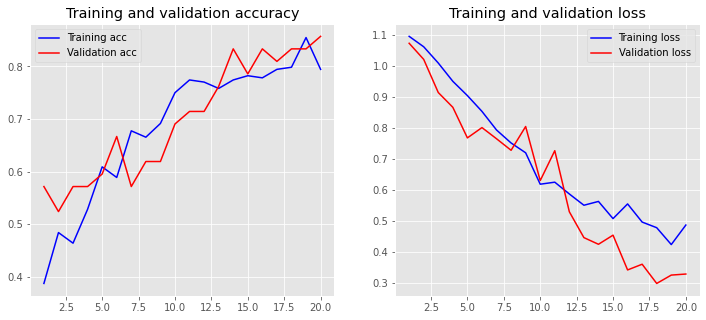

In [176]:
loss, accuracy = model1.evaluate(train_generator, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model1.evaluate(validation_generator, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [198]:
%matplotlib inline  

#img = Image.open('data/plus/cat/cat450a.jpg')
#img.show()

In [201]:
def prediction(model, image):
    #print(image.shape)
    img = cv2.imread(image)
    img = cv2.resize(img,(150,150))
    img = np.reshape(img,[1,150,150,3])
    classes = model1.predict_classes(img)
    dict_class = validation_generator.class_indices
    dct = {v: k for k, v in dict_class.items()}
    #print(dct)
    indice = classes[0]#[0]
    #print('indice = ',indice)
    #print('class = ', dct[indice])
    #plt.imshow(image)
    #plt.title(dct[indice])
    #plt.show()
    print(img.shape)
 
    return "prediction class = {}".format(dct[indice])

In [203]:
image = 'data/plus/cat/cat450a.jpg'
prediction(model,image)

(1, 150, 150, 3)


'prediction class = cats'

In [204]:
image = 'data/chien.jpg'
prediction(model,image)

(1, 150, 150, 3)


'prediction class = rabbits'

In [206]:
model1.save('model')

INFO:tensorflow:Assets written to: model/assets
